1.3

In [52]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

In [53]:
housing_df = pd.read_csv('housing.csv')
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Проведите преобразование категориального признака ocean_proximity через OneHot или Dummy-кодировку

In [54]:
DUMMY_SEP = '__'

In [55]:
housing_df = pd.get_dummies(housing_df, columns = ['ocean_proximity'], prefix_sep = DUMMY_SEP)
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity__<1H OCEAN,ocean_proximity__INLAND,ocean_proximity__ISLAND,ocean_proximity__NEAR BAY,ocean_proximity__NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


Замените признаки total_rooms и total_bedrooms на average_rooms и average_bedrooms (поделив на households).

In [56]:
housing_df['average_rooms'] = housing_df['total_rooms']/housing_df['households']
housing_df = housing_df.drop('total_rooms', axis=1)

housing_df['average_bedrooms'] = housing_df['total_bedrooms']/housing_df['households']
housing_df = housing_df.drop('total_bedrooms', axis=1)

housing_df

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity__<1H OCEAN,ocean_proximity__INLAND,ocean_proximity__ISLAND,ocean_proximity__NEAR BAY,ocean_proximity__NEAR OCEAN,average_rooms,average_bedrooms
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,6.281853,1.081081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0,5.045455,1.133333
20636,-121.21,39.49,18.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0,6.114035,1.315789
20637,-121.22,39.43,17.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0,5.205543,1.120092
20638,-121.32,39.43,18.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0,5.329513,1.171920


В признаке average_bedrooms (total_bedrooms) есть отсутствующие значения. Определите число экземпляров данных, для которых этот признак отсутствует. 

In [57]:
(housing_df['average_bedrooms'].isnull()).sum()

207

Разбейте датасет на тренировочную, валидационную и тестовую выборку

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
train_val, test =  train_test_split( housing_df, test_size =0.2)
train, val =  train_test_split( train_val, test_size =0.2)

Придумайте и обоснуйте стратегию заполнения пропусков в этой задаче. Заполните пропуски.

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
train_drop_null = train.dropna(axis = 0)
X_train = train_drop_null[['average_rooms' ]]
y_train = train_drop_null['average_bedrooms']

In [62]:
lin_reg = LinearRegression().fit(X_train, y_train)

In [63]:
def filling (selection, lin_reg):
    null = selection['average_bedrooms'].isnull()
    X = selection.loc[null,['average_rooms' ]]
    selection.loc[null, 'average_bedrooms'] = lin_reg.predict(X)

In [64]:
filling(train, lin_reg)
filling(test, lin_reg)
filling(val, lin_reg)

In [65]:
sum(
    [train['average_bedrooms'].isnull().sum(),
    test['average_bedrooms'].isnull().sum(),
    val['average_bedrooms'].isnull().sum()]
)

0

Нормализуйте признаки longitude и latitude (сделайте так, чтобы каждый признак имел среднее значение 0 и дисперсию 1 внутри обучающей выборки)

In [66]:
from sklearn import preprocessing
scaler_lon = preprocessing.StandardScaler()
scaler_lat = preprocessing.StandardScaler()

In [67]:
scaler_lon.fit(train[['longitude']])
scaler_lat.fit(train[['latitude']])

StandardScaler()

In [68]:
def normalize (selection, lon_s, lat_s):
    lon_arr = lon_s.transform(selection[['longitude']])
    selection['longitude'] = lon_arr.reshape(-1)
    
    lat_arr = lat_s.transform(selection[['latitude']])
    selection['latitude'] = lat_arr.reshape(-1)

In [69]:
normalize( train, scaler_lon, scaler_lat )
normalize( test, scaler_lon, scaler_lat )
normalize( val, scaler_lon, scaler_lat )

№2.1

In [70]:
davis_df = pd.read_csv('Davis.csv')
davis_df

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0
...,...,...,...,...,...,...
195,196,M,74,175,71.0,175.0
196,197,M,83,180,80.0,180.0
197,198,M,81,175,NaN,NaN
198,199,M,90,181,91.0,178.0


Удалите некорректные данные

In [71]:
davis_df = davis_df.loc[(davis_df['weight'] > 30) * (davis_df['weight'] < 100)]
davis_df = davis_df.loc[(davis_df['height'] > 120) * (davis_df['height'] < 200)]
davis_df = davis_df.drop('Unnamed: 0', axis=1)
davis_df

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0
...,...,...,...,...,...
195,M,74,175,71.0,175.0
196,M,83,180,80.0,180.0
197,M,81,175,NaN,NaN
198,M,90,181,91.0,178.0


Выделите тестовую выборку из 50 экземпляров

In [72]:
davis_df['sex'] = davis_df['sex'].apply(lambda sex: 1 if sex == "M" else 0)
davis_df

,sex,weight,height,repwt,repht
0,1,77,182,77.0,180.0
1,0,58,161,51.0,159.0
2,0,53,161,54.0,158.0
3,1,68,177,70.0,175.0
4,0,59,157,59.0,155.0
...,...,...,...,...,...
195,1,74,175,71.0,175.0
196,1,83,180,80.0,180.0
197,1,81,175,NaN,NaN
198,1,90,181,91.0,178.0


In [73]:
davis_df_train, davis_df_test = train_test_split(davis_df, test_size = 50)

In [74]:
import seaborn as sns

Гистограммa height

<AxesSubplot:xlabel='height', ylabel='Count'>

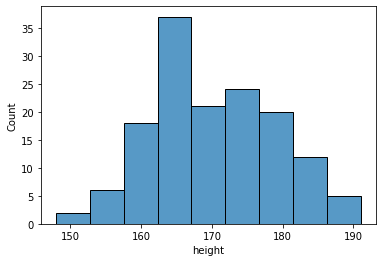

In [75]:
sns.histplot(davis_df_train['height'])

Гистограммa weight

<AxesSubplot:xlabel='weight', ylabel='Count'>

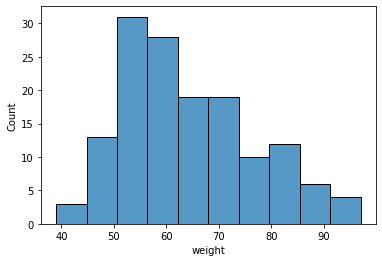

In [76]:
sns.histplot(davis_df_train['weight'])

Эти же гитограммы для разных полов

<AxesSubplot:xlabel='weight', ylabel='Count'>

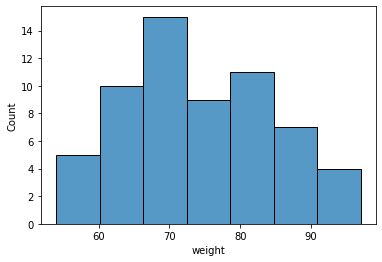

In [77]:
sns.histplot(davis_df_train.loc[davis_df_train['sex'] == 1,'weight'])

<AxesSubplot:xlabel='weight', ylabel='Count'>

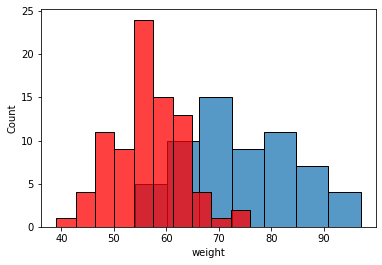

In [102]:
sns.histplot(davis_df_train.loc[davis_df_train['sex'] == 1,'weight'])
sns.histplot(davis_df_train.loc[davis_df_train['sex'] == 0,'weight'], color = 'red')

<AxesSubplot:xlabel='height', ylabel='Count'>

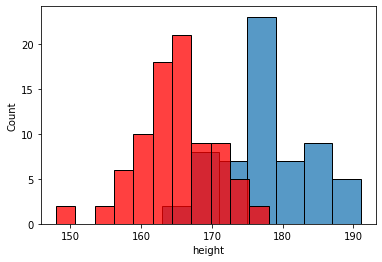

In [103]:
sns.histplot(davis_df_train.loc[davis_df_train['sex'] == 1,'height'])
sns.histplot(davis_df_train.loc[davis_df_train['sex'] == 0,'height'], color = 'red')

На тренировочных данных обучите классификатор пола (sex),используя только признаки height и weight. Замерьте производительность на тренировочной и тестовой выборке (через Accuracy).

In [80]:
X_train, y_train = davis_df_train[['height','weight']], davis_df_train['sex']
X_test, y_test = davis_df_test[['height','weight']], davis_df_test['sex']

In [81]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression().fit(X_train,y_train)

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
accuracy_score(log_reg.predict(X_train), y_train)

0.9172413793103448

In [84]:
accuracy_score(log_reg.predict(X_test), y_test)

0.88

Отобразите точки из обучающей выборки на плоскости (height-weight). Покрасьте их цветами в зависимости от пола. Раскрасьте области в зависимости от пола, предсказанного обученным в п.4. классификатором. Сделайте аналогичный график на тестовой выборке

In [85]:
x1_min, x1_max = X_train['weight'].min()-1, X_train['weight'].max()+1
x2_min, x2_max = X_train['height'].min()-1, X_train['height'].max()+1

In [86]:
xx1,xx2 = np.mgrid[x1_min:x1_max:50j, x2_min:x2_max:50j]

In [87]:
X_pred = np.column_stack([xx2.reshape(-1),xx1.reshape(-1) ])

In [88]:
y_pred = log_reg.predict(X_pred)

C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


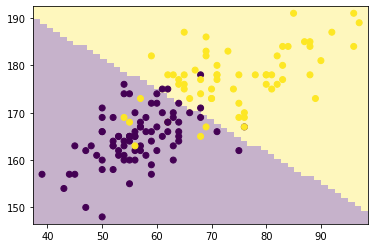

In [89]:
plt.pcolormesh(xx1,xx2, y_pred.reshape(xx1.shape), alpha=0.3, shading='auto')
plt.scatter(X_train['weight'], X_train['height'], c = y_train)
plt.show()


In [90]:
x1_min, x1_max = X_test['weight'].min()-1, X_test['weight'].max()+1
x2_min, x2_max = X_test['height'].min()-1, X_test['height'].max()+1
xx1,xx2 = np.mgrid[x1_min:x1_max:50j, x2_min:x2_max:50j]
X_pred = np.column_stack([xx2.reshape(-1),xx1.reshape(-1) ])
y_pred = log_reg.predict(X_pred)

C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


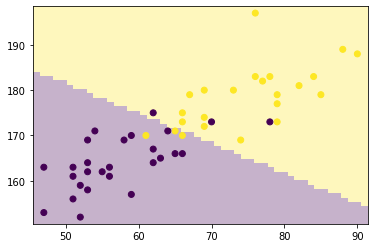

In [91]:
plt.pcolormesh(xx1,xx2, y_pred.reshape(xx1.shape), alpha=0.3, shading='auto')
plt.scatter(X_test['weight'], X_test['height'], c = y_test)
plt.show()

№2.2

In [92]:
ccpp_df = pd.read_excel('CCPP.xlsx')
ccpp_df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


Возьмите данные с листа 1 и выделите валидационную и тестовую выборку.

In [93]:
train_val, test = train_test_split(ccpp_df, test_size=0.2)
train, val = train_test_split(train_val, test_size=0.2)

Постройте регрессионную модель. Замерьте коэффициент  и среднюю ошибку предсказания на валидационной выборке.

In [94]:
X_train = train.drop("PE",axis=1)
y_train = train['PE']

In [95]:
reg = LinearRegression().fit(X_train, y_train)

In [96]:
from sklearn.metrics import r2_score

In [97]:
r2_score(test['PE'],  reg.predict(test.drop("PE",axis=1)))

0.9260303050234344

In [98]:
from sklearn.metrics import mean_absolute_error

In [99]:
mean_absolute_error(test['PE'],  reg.predict(test.drop("PE",axis=1)))

3.730969774020394

Постройте точки из валидационной выборки на плоскости (t=истинное значение, y=предсказание модели).Отобразите вместе с ними прямую y=t. 

(420.0, 500.0)

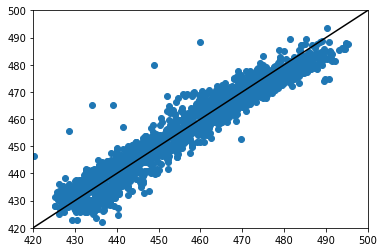

In [100]:
ax = plt.gca()
plt.scatter(test['PE'],reg.predict(test.drop("PE",axis=1)))
plt.plot([420, 500],[420,500], c = 'black')
ax.set_xlim((420, 500))
ax.set_ylim((420, 500))